# ARIMA Models

In [1]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

File ‘airline_passengers.csv’ already there; not retrieving.



In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

In [4]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


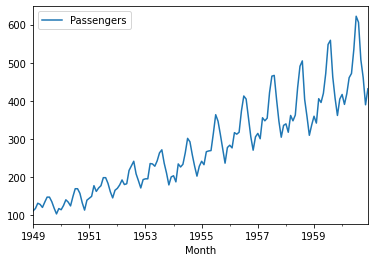

In [5]:
df.plot();

In [6]:
# calc first difference of our data
df['1stdiff'] = df['Passengers'].diff()

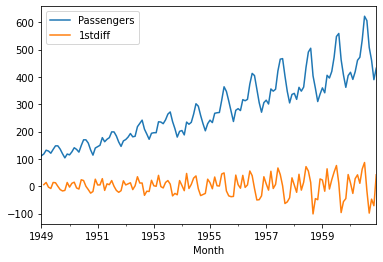

In [7]:
# plot to compare original time series and first difference
df.plot();

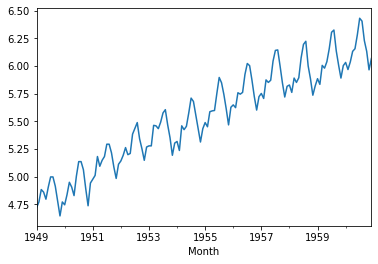

In [8]:
# compute log of passengers
df['LogPassengers'] = np.log(df['Passengers'])
df['LogPassengers'].plot();

In [9]:
from statsmodels.tsa.arima_model import ARIMA

In [10]:
# set frequency to months
df.index.freq = 'MS'
# set up train and test
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [11]:
# create AR(1) model
arima = ARIMA(train['Passengers'], order=(1,0,0))
arima_result = arima.fit()
df.loc[:-Ntest, 'AR(1)'] = arima_result.predict(start=train.index[0], end=train.index[-1])

/home/megan/projects/fineng/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
<ipython-input-11-c0ed000c47be>:4: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version

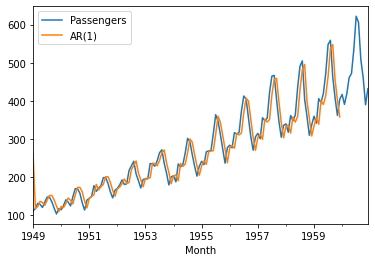

In [12]:
df[['Passengers', 'AR(1)']].plot();

In [13]:
forecast, stderr, confint = arima_result.forecast(Ntest)
df.loc[-Ntest:, 'AR(1)'] = forecast

<ipython-input-13-371c40cec2d9>:2: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  df.loc[-Ntest:, 'AR(1)'] = forecast


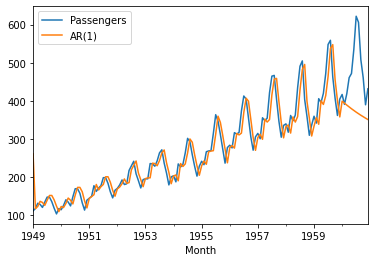

In [14]:
df[['Passengers', 'AR(1)']].plot();

This model is not very good...

In [15]:
def plot_fit_and_forecast(result):
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(df['Passengers'], label='data')
    
    # plot the curve fitted on training data
    train_pred = result.fittedvalues
    ax.plot(train.index, train_pred, color='green', label='fitted')
    
    # plot the test set
    forecast, stderr, confint = result.forecast(Ntest)
    ax.plot(test.index, forecast, label='forecast')
    ax.fill_between(test.index, confint[:,0], confint[:,1], color='red', alpha=0.3)
    
    ax.legend()

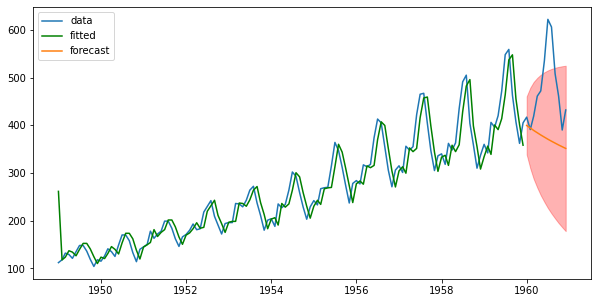

In [16]:
plot_fit_and_forecast(arima_result)

/home/megan/projects/fineng/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


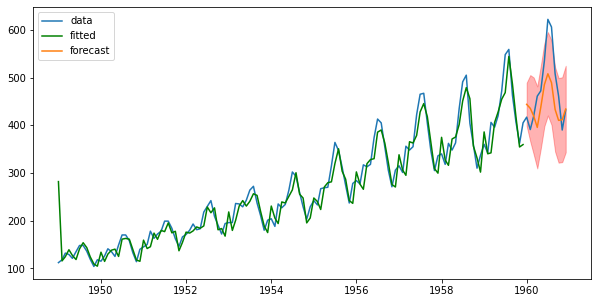

In [17]:
# create AR(10) model
arima = ARIMA(train['Passengers'], order=(10,0,0))
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)

Better, but still not great

/home/megan/projects/fineng/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


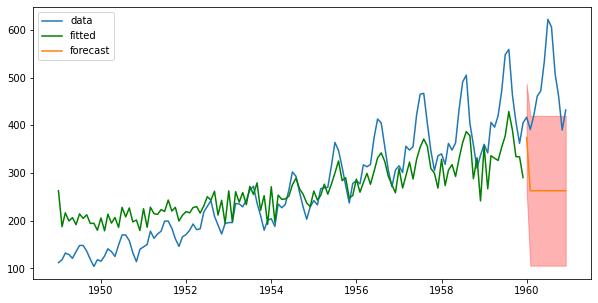

In [18]:
# create MA(1) model
arima = ARIMA(train['Passengers'], order=(0,0,1))
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)

This is bad...

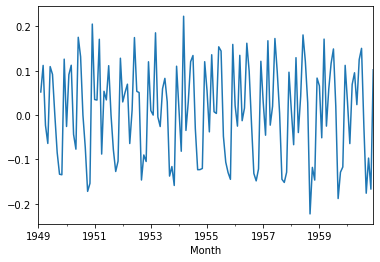

In [20]:
# investigate using LogPassengers
df['Log1stDiff'] = df['LogPassengers'].diff()
df['Log1stDiff'].plot();

These values do not seem to grow over time, so this may be stationary.

In [21]:
# create ARIMA(8,1,1) model
arima = ARIMA(train['Passengers'], order=(8,1,1))
arima_result_811 = arima.fit()

/home/megan/projects/fineng/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/megan/projects/fineng/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and stat

In [22]:
# create new function for integrated models
def plot_fit_and_forecast_int(result, d, col='Passengers'):
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(df[col], label='data')
    
    # plot the curve fitted on training data
    train_pred = result.predict(start=train.index[d], end=train.index[-1], typ='levels')
    ax.plot(train.index[d:], train_pred, color='green', label='fitted')
    
    # plot the test set
    forecast, stderr, confint = result.forecast(Ntest)
    ax.plot(test.index, forecast, label='forecast')
    ax.fill_between(test.index, confint[:,0], confint[:,1], color='red', alpha=0.3)
    
    ax.legend()

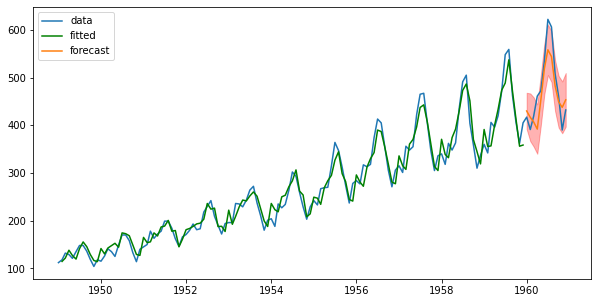

In [23]:
plot_fit_and_forecast_int(arima_result_811, 1)

In [24]:
def plot_difference(result, d, col='Passengers'):
    train_pred = result.predict(start=train.index[d], end=train.index[-1])
    diff=df[col].diff()
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(diff, label='true 1st difference')
    ax.plot(train_pred, label='fitted 1st difference')

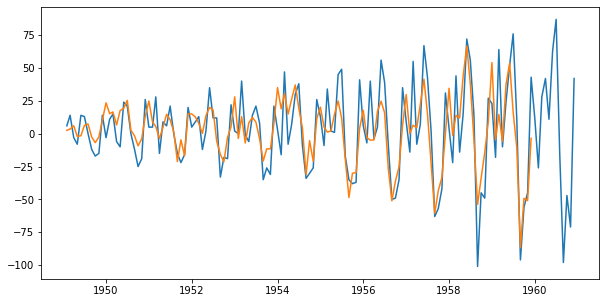

In [25]:
plot_difference(arima_result_811, 1)

/home/megan/projects/fineng/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/megan/projects/fineng/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and stat

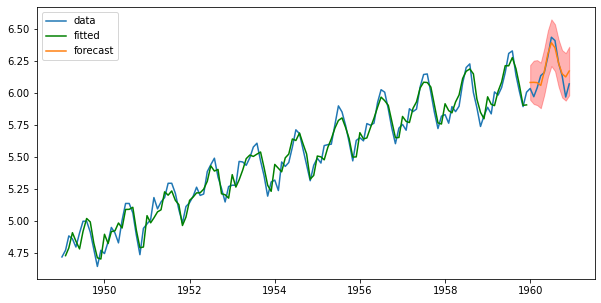

In [26]:
# redo this on LogPassengers instead of Passengers
arima = ARIMA(train['LogPassengers'], order=(8,1,1))
arima_result_log811 = arima.fit()
plot_fit_and_forecast_int(arima_result_log811, 1, col='LogPassengers')

This model does pretty well.

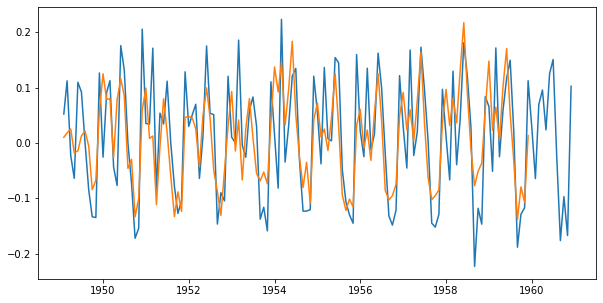

In [27]:
plot_difference(arima_result_log811, 1, col='LogPassengers')

/home/megan/projects/fineng/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


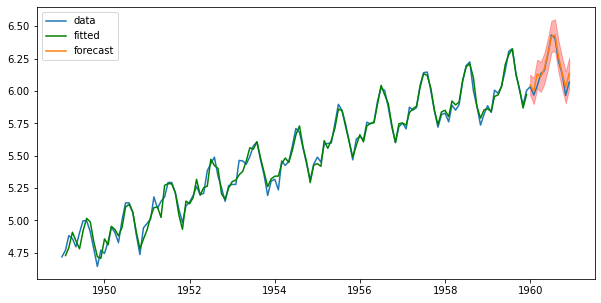

In [28]:
# try again with order 12, 1, 0
arima = ARIMA(train['LogPassengers'], order=(12,1,0))
arima_result_log1210 = arima.fit()
plot_fit_and_forecast_int(arima_result_log1210, 1, col='LogPassengers')

In [29]:
# calc RMSE to compare models
def rmse(result, is_logged):
    forecast, stderr, confint = result.forecast(Ntest)
    if is_logged:
        forecast = np.exp(forecast)
    t = test['Passengers']
    y = forecast
    return np.sqrt(np.mean((t - y)**2))

In [30]:
print("ARIMA(8,1,1): ", rmse(arima_result_811, False))
print("ARIMA(8,1,1) logged: ", rmse(arima_result_log811, True))
print("ARIMA(12,1,0) logged: ", rmse(arima_result_log1210, True))

ARIMA(8,1,1):  38.55068489939283
ARIMA(8,1,1) logged:  32.22402482969385
ARIMA(12,1,0) logged:  18.612495286344675


We can see that our last iteration was a big improvement in RMSE on the test set.

Logging the data does improve the model, and adding more lagged values also improves the model.